# rsEGFP2 WT Switching QY

## ON->OFF

## Load Experimental Switching Data

We begin by importing the required library and loading the actinometry measurement data from a CSV file. The dataset is stored in `exp_data` for further analysis


In [1]:
import pandas as pd

exp_data = pd.read_csv("DATA/prot1 ON2OFF.csv")

exp_data

,timestamp,cycle,type,186.85486,187.31995223015844,187.78500323297956,188.250012996982,188.71498151068454,189.17990876260572,189.64479474126426,...,1032.9632529736894,1033.3204920667242,1033.6776665334785,1034.034776362471,1034.3918215422202,1034.7488020612445,1035.1057179080635,1035.4625690711953,1035.8193555391586,1036.176077300472
0,2025-04-04 13:05:43.323760,1,zero,16.990556,24978.543889,59.831028,47.330833,62.015528,71.481694,76.942944,...,470.274306,455.953694,458.259556,465.662583,459.958611,461.657667,467.847083,466.512111,466.512111,466.512111
1,2025-04-04 13:06:24.439856,1,on,16.990556,24978.543889,60.195111,42.233667,55.097944,67.234056,57.525167,...,457.774111,464.084889,463.114000,457.288667,441.511722,455.346889,469.182056,456.560500,456.560500,456.560500
2,2025-04-04 13:06:25.472725,1,on,16.990556,24978.543889,57.174568,48.544444,41.802160,43.150617,67.692531,...,453.081481,459.554074,460.632840,454.429938,472.229568,473.038642,461.981296,435.821235,435.821235,435.821235
3,2025-04-04 13:06:26.506516,1,on,16.990556,24978.543889,74.030278,60.437833,58.981500,54.369778,53.641611,...,462.871278,474.036500,470.881111,459.230444,455.346889,477.434611,456.075056,451.463333,451.463333,451.463333
4,2025-04-04 13:06:27.537642,1,on,16.990556,24978.543889,55.826111,47.195988,54.207963,80.907407,69.850062,...,471.690185,486.523210,459.823765,473.847716,457.126852,462.520679,440.945370,446.878580,446.878580,446.878580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2025-04-04 13:13:02.957585,1,on,16.990556,24978.543889,34.250802,37.756790,59.601790,63.916852,55.826111,...,435.281852,464.138827,449.575494,446.878580,447.957346,459.554074,450.384568,449.845185,449.845185,449.845185
387,2025-04-04 13:13:03.987853,1,on,16.990556,24978.543889,58.792716,15.372407,35.599259,54.747346,83.604321,...,463.599444,464.138827,464.138827,454.969321,460.363148,433.124321,450.923951,447.417963,447.417963,447.417963
388,2025-04-04 13:13:05.020339,1,on,16.990556,24978.543889,30.475123,42.880926,57.983642,69.040988,55.017037,...,471.150802,478.432469,456.048086,444.990741,465.217593,461.172222,452.002716,445.260432,445.260432,445.260432
389,2025-04-04 13:13:06.054197,1,on,16.990556,24978.543889,53.129198,22.923765,36.678025,38.835556,69.580370,...,438.248457,441.754444,446.339198,457.396543,455.239012,449.305802,435.281852,457.935926,457.935926,457.935926


## Preprocess Spectral Data and Compute Absorbance

We now prepare the spectral intensity data for analysis. The dataset contains different types of measurements:
- **"zero"**: baseline measurements,
- **"static"**: background noise or dark reference,
- **Other types**: actual actinometry measurements over time.

We extract these components, convert timestamps, and compute the absorbance spectrum using the formula:

$$A(\lambda) = -\log_{10} \left( \frac{I(\lambda) - I_{\text{static}}(\lambda)}{I_{\text{zero}}(\lambda) - I_{\text{static}}(\lambda)} \right)$$

This normalization corrects for both dark current and reference intensity variations.


In [2]:
import numpy as np

intensities=np.array(exp_data[(exp_data["type"] != "zero") & (exp_data["type"] != "static")].iloc[:, 3:], dtype=np.float64)
static=np.array(exp_data[(exp_data["type"]== "static")].iloc[:, 3:], dtype=np.float64)[0]
zero=np.array(exp_data[(exp_data["type"]== "zero")].iloc[:, 3:], dtype=np.float64)[0]
wavelengths = np.array(exp_data.columns[3:], dtype=np.float64)
timestamps = pd.to_datetime(exp_data["timestamp"][(exp_data["type"] != "zero") & (exp_data["type"] != "static")]) # Convert timestamp strings to datetime objects
timestamps = np.array((timestamps - timestamps.iloc[0]).dt.total_seconds()) # Convert to seconds since the first timestamp

def compute_absorbance(intensities: np.ndarray, static: np.ndarray, zero: np.ndarray) -> np.ndarray:
    EPS = 1e-12
    num = intensities - static
    den = np.maximum(zero - static, EPS)  # Éviter division par zéro
    absorbance = -np.log10(np.maximum(num / den, EPS))  # Éviter log(0) ou log(négatif)
    return absorbance

absorbance = compute_absorbance(intensities, static, zero)

## Visualizing Spectral Intensity and Absorbance

This figure provides a comprehensive view of the switching data:

1. **Left Panel**: Raw intensity spectra at three time points, along with the static and zero references.
2. **Middle Panel**: Corresponding absorbance spectra at the same time points, showing how absorption evolves over time.
3. **Right Panel**: Absorbance at two key wavelengths (482 nm and 408 nm) plotted as a function of time, highlighting dynamic changes in the sample.

These plots help assess the stability and dynamics of the measured signals and the quality of the zero/static references.


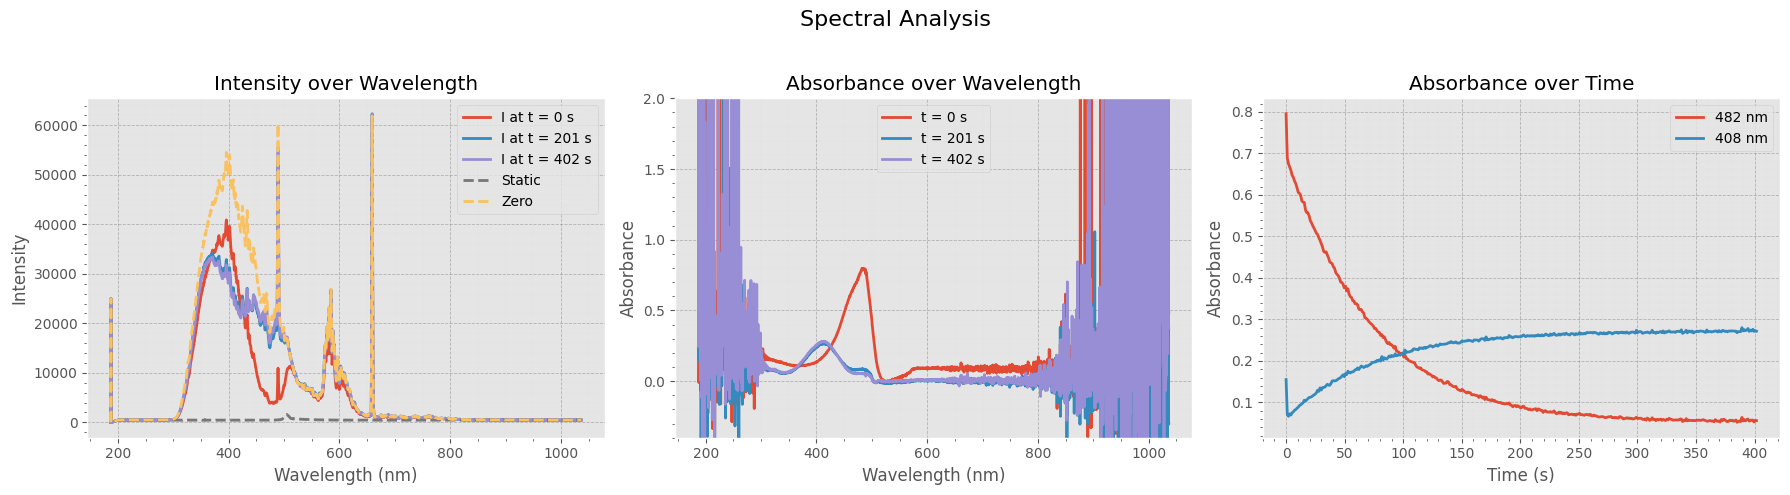

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Set global style
plt.style.use("ggplot")  # Clean style

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Spectral Analysis", fontsize=16)

# --- Intensity Plot ---
axs[0].plot(wavelengths, intensities[0, :], label=f"I at t = {timestamps[0]:.0f} s", linewidth=2)
axs[0].plot(wavelengths, intensities[len(intensities)//2, :], label=f"I at t = {timestamps[len(intensities)//2]:.0f} s", linewidth=2)
axs[0].plot(wavelengths, intensities[-1, :], label=f"I at t = {timestamps[-1]:.0f} s", linewidth=2)
axs[0].plot(wavelengths, static, '--', label="Static", linewidth=2)
axs[0].plot(wavelengths, zero, '--', label="Zero", linewidth=2)
axs[0].set_title("Intensity over Wavelength")
axs[0].set_xlabel("Wavelength (nm)")
axs[0].set_ylabel("Intensity")
axs[0].legend()
axs[0].grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', alpha=0.5, zorder=0)
axs[0].minorticks_on()
axs[0].grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.4, zorder=0)
# --- Absorbance Plot ---
axs[1].plot(wavelengths, absorbance[0, :], label=f"t = {timestamps[0]:.0f} s", linewidth=2)
axs[1].plot(wavelengths, absorbance[len(absorbance)//2, :], label=f"t = {timestamps[len(absorbance)//2]:.0f} s", linewidth=2)
axs[1].plot(wavelengths, absorbance[-1, :], label=f"t = {timestamps[-1]:.0f} s", linewidth=2)
axs[1].set_title("Absorbance over Wavelength")
axs[1].set_xlabel("Wavelength (nm)")
axs[1].set_ylabel("Absorbance")
axs[1].set_ylim(-0.4, 2)
axs[1].legend()
axs[1].grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', alpha=0.5, zorder=0)
axs[1].minorticks_on()
axs[1].grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.4, zorder=0)
# --- Absorbance vs Time Plot ---
WL = [482, 408]
idxs = [np.argmin(np.abs(wavelengths - wl)) for wl in WL]

for i, idx in enumerate(idxs):
    axs[2].plot(timestamps, absorbance[:, idx], label=f"{wavelengths[idx]:.0f} nm", linewidth=2)

axs[2].set_title("Absorbance over Time")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Absorbance")
axs[2].legend()
axs[2].grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', alpha=0.5, zorder=0)
axs[2].minorticks_on()
axs[2].grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.4, zorder=0)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Data Cleaning and Absorbance Subset Preparation

This cell prepares the dataset for focused analysis by:

- Selecting a narrow wavelength range (e.g. 480–484 nm)
- Normalizing absorbance values
- Removing unwanted time points (first spectrum and last 300)

The resulting cleaned subset is suitable for targeted visualization or kinetic analysis.

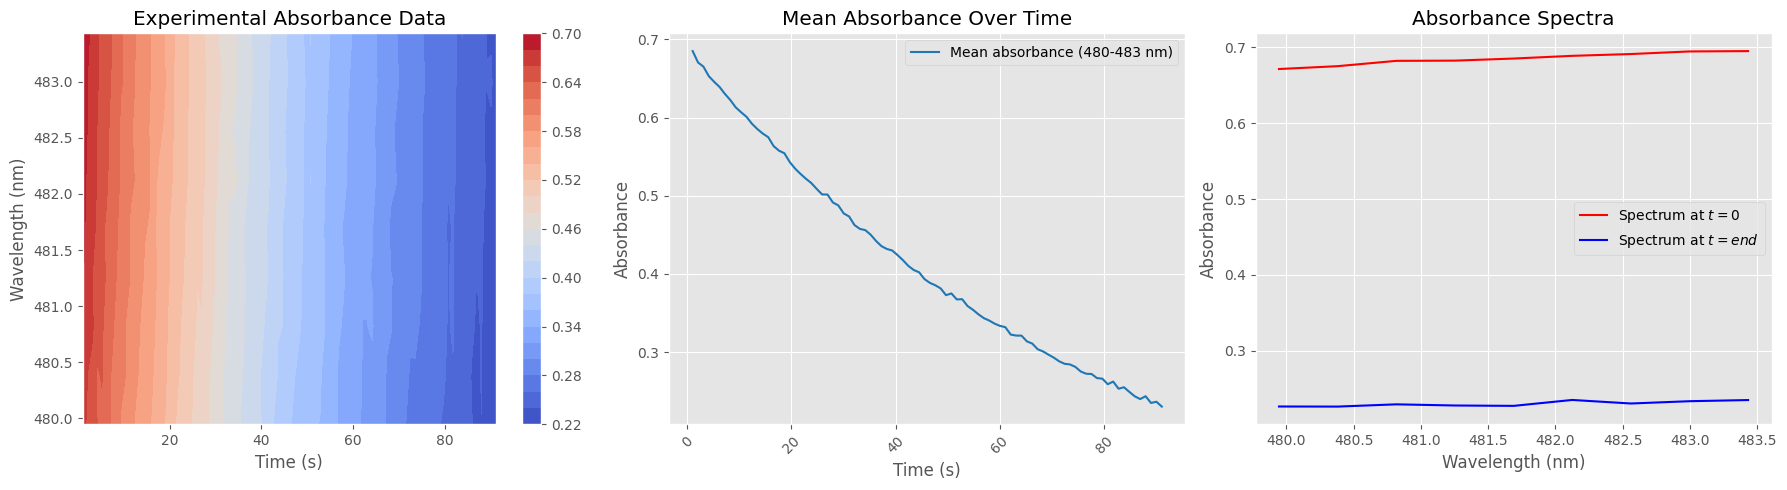

In [4]:
# Define wavelength range of interest
wavelength_range = [480, 484]
idx_range = np.argmin(np.abs(wavelengths[:, None] - wavelength_range), axis=0)

# Extract and normalize absorbance data within the wavelength range
absorbance_subset = absorbance[:, idx_range[0]:idx_range[1]]
# absorbance_subset -= np.min(absorbance_subset)
wavelengths_subset = wavelengths[idx_range[0]:idx_range[1]]

# Filter out specific time points (e.g., first frame and last 300 entries)
# Adjust indices as needed
time_filter_indices = [0] + list(range(-300, 0))
absorbance_subset = np.delete(absorbance_subset, time_filter_indices, axis=0)
timestamps_filtered = np.delete(timestamps, time_filter_indices)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# --- 1. Absorbance Heatmap ---
X, Y = np.meshgrid(timestamps_filtered, wavelengths_subset)
contour = axs[0].contourf(X, Y, absorbance_subset.T, levels=30, cmap="coolwarm")
axs[0].set_title("Experimental Absorbance Data")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Wavelength (nm)")
fig.colorbar(contour, ax=axs[0])

# --- 2. Absorbance Over Time (Averaged Across Wavelength Range) ---
mean_absorbance = np.mean(absorbance_subset, axis=1)
axs[1].plot(timestamps_filtered, mean_absorbance, label=f"Mean absorbance ({wavelengths_subset[0]:.0f}-{wavelengths_subset[-1]:.0f} nm)", color='tab:blue')
axs[1].set_title("Mean Absorbance Over Time")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Absorbance")
axs[1].tick_params(axis="x", rotation=45)
axs[1].legend()
axs[1].grid(True)

# --- 3. Absorbance Spectrum at Start and End ---
axs[2].plot(wavelengths_subset, absorbance_subset[0, :], label="Spectrum at $t=0$", color='red')
axs[2].plot(wavelengths_subset, absorbance_subset[-1, :], label="Spectrum at $t=end$", color='blue')
axs[2].set_title("Absorbance Spectra")
axs[2].set_xlabel("Wavelength (nm)")
axs[2].set_ylabel("Absorbance")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

## QY ON->OFF Regression

=== Fit Results I=1.427e-02 W ===
Parameter 1: 0.0096 ± 0.0001
Parameter 2: 0.9765 ± 0.0604
Parameter 3: -0.0000 ± 0.0000


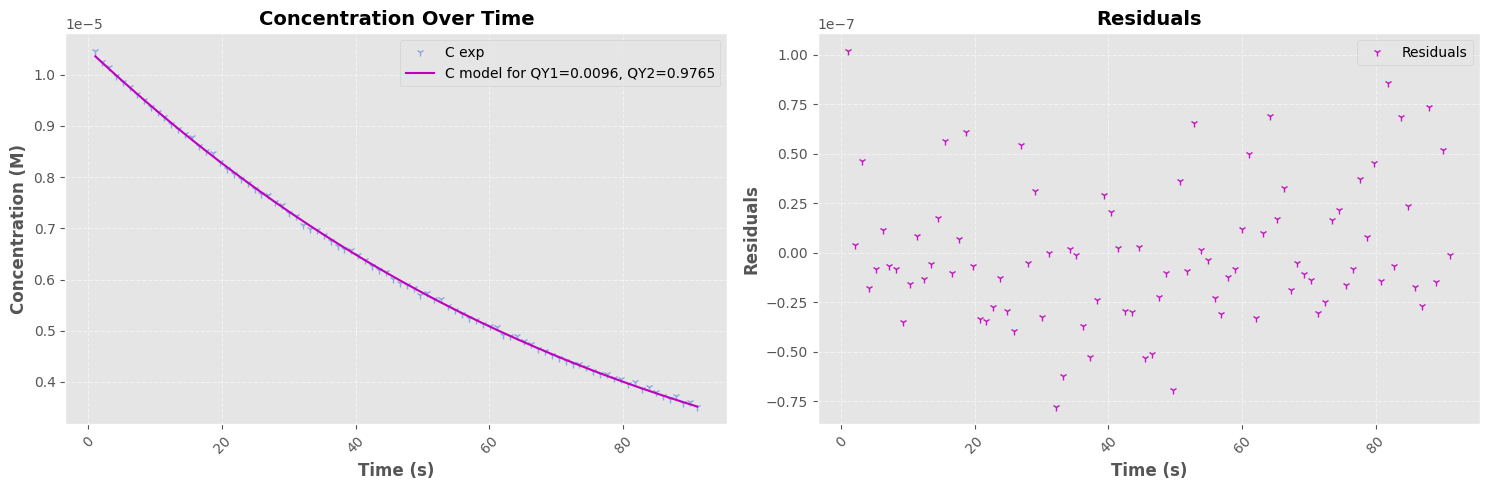

=== Fit Results I=1.040e-02 W ===
Parameter 1: 0.0129 ± 0.0001
Parameter 2: 0.9972 ± 0.1030
Parameter 3: -0.0000 ± 0.0000


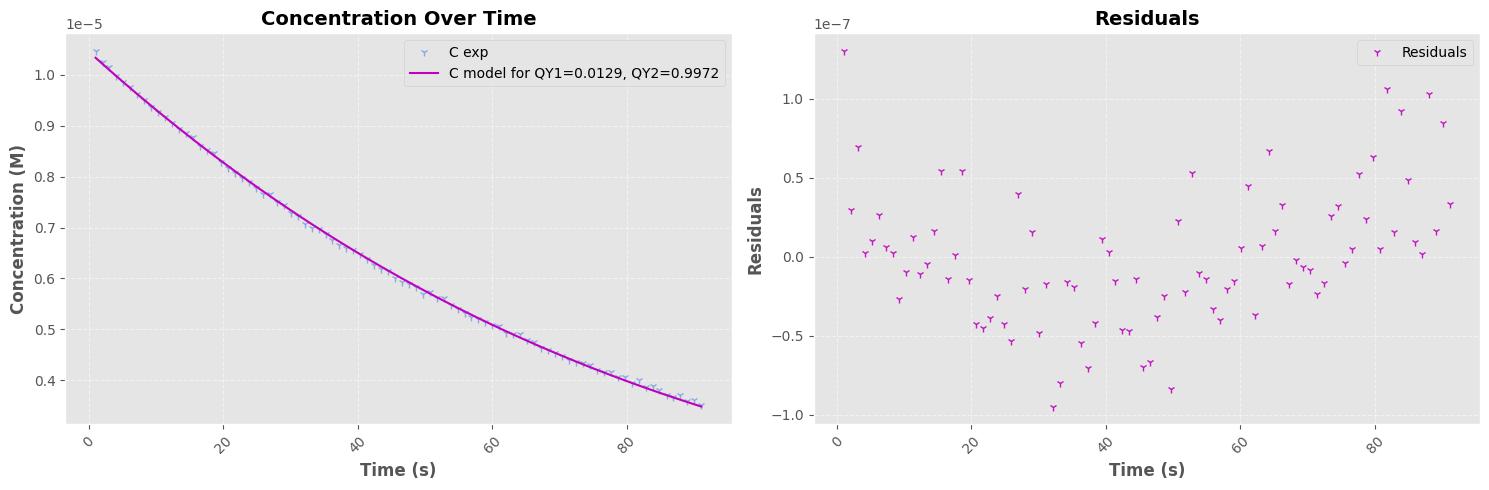

In [5]:
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# === Physics constants ===
h = 6.62607004 * 10 ** (-34)  # Planck's constant (J·s)
NA = 6.02214086 * 10 ** (23)  # Avogadro's number (mol^-1)
c_vaccum = 299792458  # Speed of light in vacuum (m/s)
wl = 505  # Wavelength (nm)
v = c_vaccum / (wl * 1e-9)  # Frequency (Hz)
volume = 23e-4  # Volume (L)
l = 1  # Path length (cm)
eps_on_482 = 65474  # Molar absorptivity (L·mol^-1·cm^-1)
eps_off_482 = 65  # Molar absorptivity (L·mol^-1·cm^-1)
eps_on_505 = 0.4166666667 * eps_on_482  # Adjusted molar absorptivity at 505
eps_off_505 = 0.4166666667 * eps_off_482  # Adjusted molar absorptivity at 505
I_w_list = [14.27e-3, 10.4e-3]  # Irradiance values (W/m^2)

# === Experimental data ===
# Assuming 'timestamps_filtered' and 'C_exp' are already defined

# === Initialize parameters ===
lpopt = []
for I_w in I_w_list:
    # Compute initial concentration based on experimental data
    C_exp = mean_absorbance / (eps_on_482 * l)
    C0 = C_exp[0]
    I_0 = I_w / (h * v * NA) / volume  # Photon irradiance (mol·L^-1·s^-1)

    # === ODE definition ===
    def dC_dt(t, C_ON, QY_ON2OFF, QY_OFF2ON):
        C_OFF = C0 - C_ON
        Iabs_ON = I_0 * (1 - np.exp(-eps_on_505 * C_ON * l * np.log(10)))
        Iabs_OFF = I_0 * (1 - np.exp(-eps_off_505 * C_OFF * l * np.log(10)))
        dCCF_deri = -QY_ON2OFF * Iabs_ON + QY_OFF2ON * Iabs_OFF
        return dCCF_deri

    # === Fitting function wrapper ===
    def model(t, QY_ON2OFF, QY_OFF2ON, offset):
        sol = solve_ivp(dC_dt, [t[0], t[-1]], [C0], args=(QY_ON2OFF, QY_OFF2ON), t_eval=t)
        if not sol.success:
            print("⚠️ ODE solver failed:", sol.message)
            return np.full_like(t, np.nan)
        return sol.y[0]+ offset

    # === Fit the model to the experimental data ===
    initial_guess = (0.001, 0.01, 0) # QY_ON2OFF, QY_OFF2ON, offset
    bounds = ([1e-4, 1e-4,-1], [0.2, 1,1]) # ([min1, min2, ...], [max1, max2, ...])
    popt, pcov = curve_fit(model, timestamps_filtered, C_exp, p0=initial_guess, bounds=bounds)

    # Extract fitted parameters and compute uncertainties
    uncertainties = np.sqrt(np.diag(pcov))
    lpopt.append(popt)
    print(f"=== Fit Results I={I_w:0.3e} W ===")
    for i, (coef, incert) in enumerate(zip(popt, uncertainties), start=1):
        print(f"Parameter {i}: {coef:.4f} ± {incert:.4f}")

    # Compute fitted values
    fitted_values = model(timestamps_filtered, *popt)

    # === Plotting ===
    fig, a = plt.subplots(1, 2, figsize=(15, 5))
    pastel_colors = ["m", "#f9955e", "#5080e0"]  # Mauve, orange, sky blue

    # First Plot - Concentration Over Time
    a[0].plot(timestamps_filtered, C_exp, "1", color=pastel_colors[2], label="C exp", alpha=0.6)
    a[0].plot(timestamps_filtered, fitted_values, "-", color=pastel_colors[0], label=f"C model for QY1={popt[0]:0.4f}, QY2={popt[1]:0.4f}")
    a[0].set_xlabel("Time (s)", fontsize=12, fontweight="bold")
    a[0].set_ylabel("Concentration (M)", fontsize=12, fontweight="bold")
    a[0].set_title("Concentration Over Time", fontsize=14, fontweight="bold")
    a[0].tick_params(axis="x", rotation=45)
    a[0].grid(linestyle="--", alpha=0.5)
    a[0].legend()

    # Second Plot - Residuals Over Time
    residuals = C_exp - fitted_values
    a[1].plot(timestamps_filtered, residuals, "1", color=pastel_colors[0], label="Residuals", alpha=0.9)
    a[1].set_xlabel("Time (s)", fontsize=12, fontweight="bold")
    a[1].set_ylabel("Residuals", fontsize=12, fontweight="bold")
    a[1].set_title("Residuals", fontsize=14, fontweight="bold")
    a[1].tick_params(axis="x", rotation=45)
    a[1].grid(linestyle="--", alpha=0.5)
    a[1].legend()

    plt.tight_layout()
    plt.show()


# OFF -> ON

## Load Experimental Switching Data

We begin by importing the required library and loading the actinometry measurement data from a CSV file. The dataset is stored in `exp_data` for further analysis


In [6]:
import pandas as pd

exp_data = pd.read_csv("DATA/prot1 OFF2ON.csv")

exp_data

,timestamp,cycle,type,186.85486,187.31995223015844,187.78500323297956,188.250012996982,188.71498151068454,189.17990876260572,189.64479474126426,...,1032.9632529736894,1033.3204920667242,1033.6776665334785,1034.034776362471,1034.3918215422202,1034.7488020612445,1035.1057179080635,1035.4625690711953,1035.8193555391586,1036.176077300472
0,2025-04-04 13:18:08.282867,1,zero,16.990556,24978.543889,33.859750,28.155778,33.738389,40.898694,38.956917,...,449.157472,435.807750,441.026278,435.443667,437.021361,448.672028,442.968056,451.463333,451.463333,451.463333
1,2025-04-04 13:18:36.280977,1,off,16.990556,24978.543889,45.038457,22.114691,31.823580,32.093272,49.623210,...,441.215062,443.642284,457.935926,446.339198,431.506173,445.530123,440.405988,450.384568,450.384568,450.384568
2,2025-04-04 13:18:37.311192,1,off,16.990556,24978.543889,31.823580,22.114691,42.341543,53.938272,58.792716,...,450.114877,450.384568,433.933395,450.923951,459.823765,444.721049,440.136296,459.823765,459.823765,459.823765
3,2025-04-04 13:18:38.352852,1,off,16.990556,24978.543889,54.477654,32.093272,37.487099,50.162593,59.332099,...,440.675679,443.372593,440.405988,445.530123,430.966790,437.439383,452.272407,429.078951,429.078951,429.078951
4,2025-04-04 13:18:39.383552,1,off,16.990556,24978.543889,39.644630,36.947716,37.756790,31.284198,61.219938,...,425.033580,463.599444,445.530123,451.193642,443.642284,453.620864,435.012160,434.203086,434.203086,434.203086
5,2025-04-04 13:18:40.416396,1,off,16.990556,24978.543889,19.687469,33.172037,42.341543,18.608704,38.296173,...,453.620864,446.878580,429.888025,438.518148,424.494198,439.327222,434.203086,451.193642,451.193642,451.193642
6,2025-04-04 13:18:41.449506,1,off,16.990556,24978.543889,28.317593,28.317593,30.205432,32.093272,42.611235,...,461.172222,433.933395,444.181667,432.315247,436.900000,419.909444,459.014691,448.766420,448.766420,448.766420
7,2025-04-04 13:18:42.486227,1,off,16.990556,24978.543889,40.453704,46.656605,20.766235,49.623210,65.265309,...,446.878580,450.114877,426.382037,429.348642,425.842654,437.169691,444.990741,449.036111,449.036111,449.036111
8,2025-04-04 13:18:43.531508,1,off,16.990556,24978.543889,32.093272,29.126667,25.890370,38.835556,52.859506,...,447.687654,445.260432,448.766420,435.281852,428.539568,415.594383,435.012160,425.303272,425.303272,425.303272
9,2025-04-04 13:18:44.565058,1,off,16.990556,24978.543889,31.014506,39.105247,51.780741,29.396358,63.107778,...,433.124321,458.205617,449.845185,447.687654,442.833210,439.057531,423.145741,439.866605,439.866605,439.866605


In [7]:
import numpy as np

intensities=np.array(exp_data[(exp_data["type"] != "zero") & (exp_data["type"] != "static")].iloc[:, 3:], dtype=np.float64)
static=np.array(exp_data[(exp_data["type"]== "static")].iloc[:, 3:], dtype=np.float64)[0]
zero=np.array(exp_data[(exp_data["type"]== "zero")].iloc[:, 3:], dtype=np.float64)[0]
wavelengths = np.array(exp_data.columns[3:], dtype=np.float64)
timestamps = pd.to_datetime(exp_data["timestamp"][(exp_data["type"] != "zero") & (exp_data["type"] != "static")]) # Convert timestamp strings to datetime objects
timestamps = np.array((timestamps - timestamps.iloc[0]).dt.total_seconds()) # Convert to seconds since the first timestamp

def compute_absorbance(intensities: np.ndarray, static: np.ndarray, zero: np.ndarray) -> np.ndarray:
    EPS = 1e-12
    num = intensities - static
    den = np.maximum(zero - static, EPS)  # Éviter division par zéro
    absorbance = -np.log10(np.maximum(num / den, EPS))  # Éviter log(0) ou log(négatif)
    return absorbance

absorbance = compute_absorbance(intensities, static, zero)

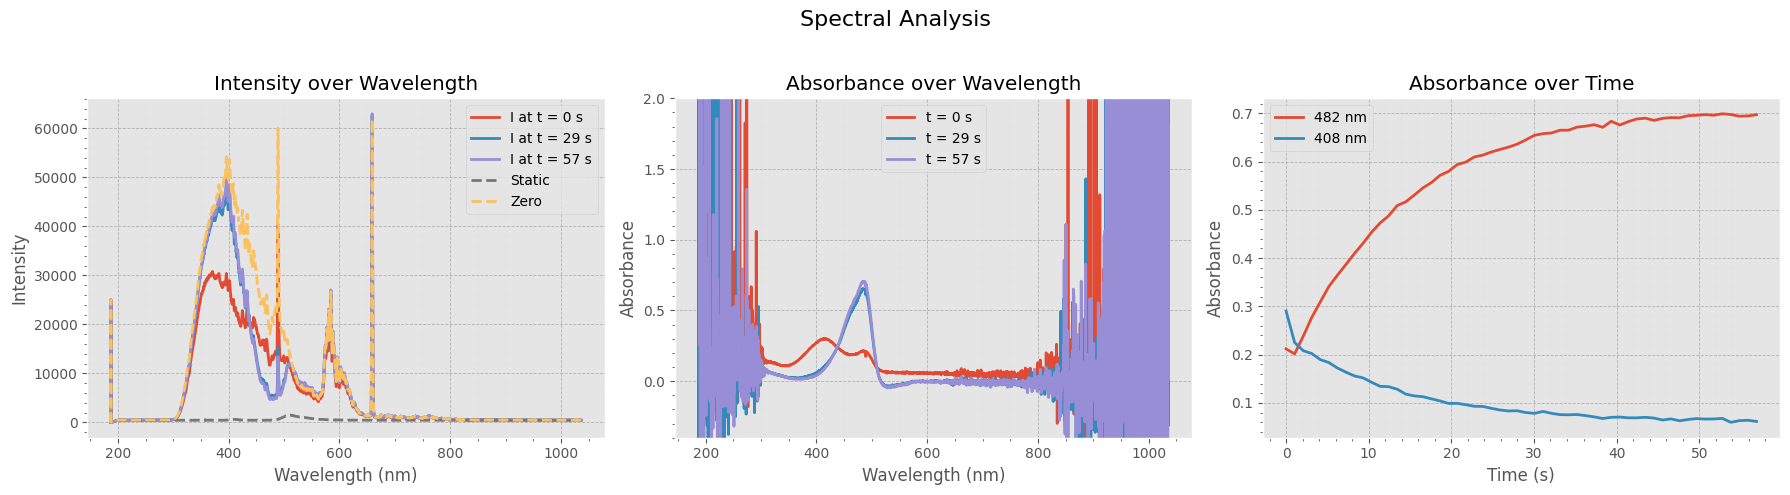

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Set global style
plt.style.use("ggplot")  # Clean style

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Spectral Analysis", fontsize=16)

# --- Intensity Plot ---
axs[0].plot(wavelengths, intensities[0, :], label=f"I at t = {timestamps[0]:.0f} s", linewidth=2)
axs[0].plot(wavelengths, intensities[len(intensities)//2, :], label=f"I at t = {timestamps[len(intensities)//2]:.0f} s", linewidth=2)
axs[0].plot(wavelengths, intensities[-1, :], label=f"I at t = {timestamps[-1]:.0f} s", linewidth=2)
axs[0].plot(wavelengths, static, '--', label="Static", linewidth=2)
axs[0].plot(wavelengths, zero, '--', label="Zero", linewidth=2)
axs[0].set_title("Intensity over Wavelength")
axs[0].set_xlabel("Wavelength (nm)")
axs[0].set_ylabel("Intensity")
axs[0].legend()
axs[0].grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', alpha=0.5, zorder=0)
axs[0].minorticks_on()
axs[0].grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.4, zorder=0)
# --- Absorbance Plot ---
axs[1].plot(wavelengths, absorbance[0, :], label=f"t = {timestamps[0]:.0f} s", linewidth=2)
axs[1].plot(wavelengths, absorbance[len(absorbance)//2, :], label=f"t = {timestamps[len(absorbance)//2]:.0f} s", linewidth=2)
axs[1].plot(wavelengths, absorbance[-1, :], label=f"t = {timestamps[-1]:.0f} s", linewidth=2)
axs[1].set_title("Absorbance over Wavelength")
axs[1].set_xlabel("Wavelength (nm)")
axs[1].set_ylabel("Absorbance")
axs[1].set_ylim(-0.4, 2)
axs[1].legend()
axs[1].grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', alpha=0.5, zorder=0)
axs[1].minorticks_on()
axs[1].grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.4, zorder=0)
# --- Absorbance vs Time Plot ---
WL = [482, 408]
idxs = [np.argmin(np.abs(wavelengths - wl)) for wl in WL]

for i, idx in enumerate(idxs):
    axs[2].plot(timestamps, absorbance[:, idx], label=f"{wavelengths[idx]:.0f} nm", linewidth=2)

axs[2].set_title("Absorbance over Time")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Absorbance")
axs[2].legend()
axs[2].grid(True, which='major', linestyle='--', linewidth=0.6, color='gray', alpha=0.5, zorder=0)
axs[2].minorticks_on()
axs[2].grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.4, zorder=0)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

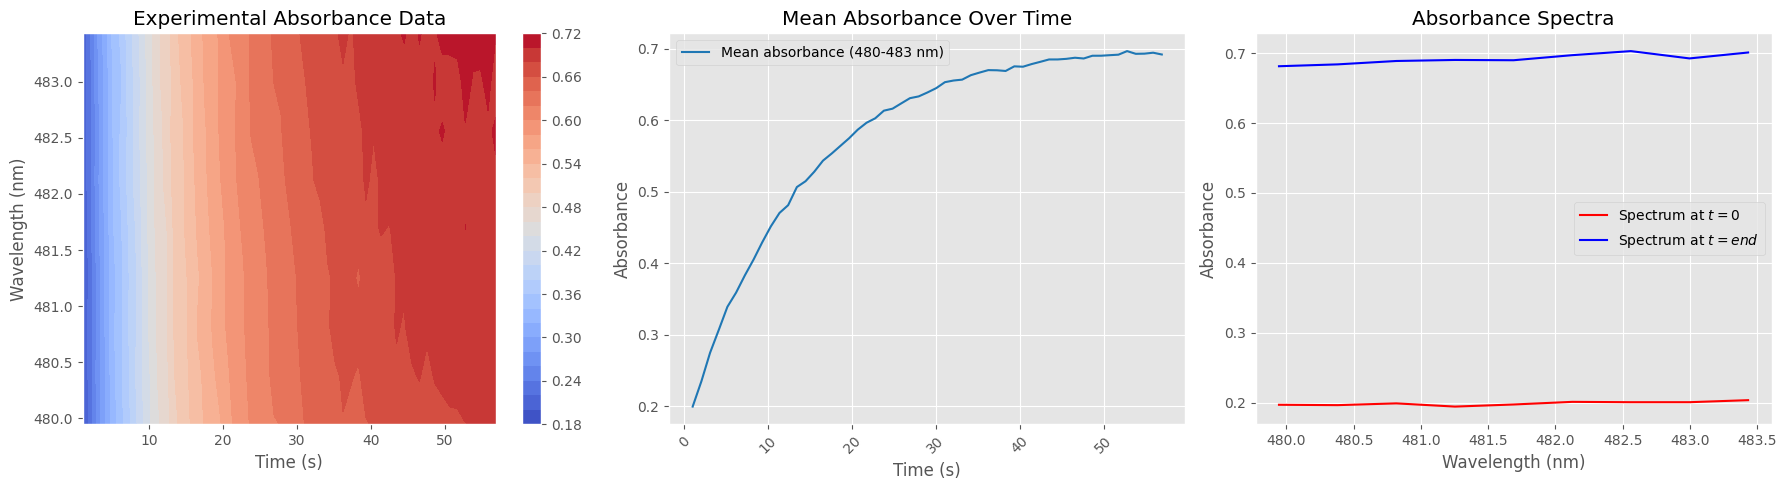

In [9]:
# la premiere mesure doit etre viré

# Define wavelength range of interest
wavelength_range = [480, 484]
idx_range = np.argmin(np.abs(wavelengths[:, None] - wavelength_range), axis=0)

# Extract and normalize absorbance data within the wavelength range
absorbance_subset = absorbance[:, idx_range[0]:idx_range[1]]
# absorbance_subset -= np.min(absorbance_subset)
wavelengths_subset = wavelengths[idx_range[0]:idx_range[1]]

# Filter out specific time points (e.g., first frame and last 300 entries)
# Adjust indices as needed
time_filter_indices = [0] #+ list(range(-45, 0))
absorbance_subset = np.delete(absorbance_subset, time_filter_indices, axis=0)
timestamps_filtered = np.delete(timestamps, time_filter_indices)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# --- 1. Absorbance Heatmap ---
X, Y = np.meshgrid(timestamps_filtered, wavelengths_subset)
contour = axs[0].contourf(X, Y, absorbance_subset.T, levels=30, cmap="coolwarm")
axs[0].set_title("Experimental Absorbance Data")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Wavelength (nm)")
fig.colorbar(contour, ax=axs[0])

# --- 2. Absorbance Over Time (Averaged Across Wavelength Range) ---
mean_absorbance = np.mean(absorbance_subset, axis=1)
axs[1].plot(timestamps_filtered, mean_absorbance, label=f"Mean absorbance ({wavelengths_subset[0]:.0f}-{wavelengths_subset[-1]:.0f} nm)", color='tab:blue')
axs[1].set_title("Mean Absorbance Over Time")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Absorbance")
axs[1].tick_params(axis="x", rotation=45)
axs[1].legend()
axs[1].grid(True)

# --- 3. Absorbance Spectrum at Start and End ---
axs[2].plot(wavelengths_subset, absorbance_subset[0, :], label="Spectrum at $t=0$", color='red')
axs[2].plot(wavelengths_subset, absorbance_subset[-1, :], label="Spectrum at $t=end$", color='blue')
axs[2].set_title("Absorbance Spectra")
axs[2].set_xlabel("Wavelength (nm)")
axs[2].set_ylabel("Absorbance")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

=== Fit Results I=3.800e-03 W ===
Parameter 1: 0.0014 ± 0.0013
Parameter 2: 0.4951 ± 0.0044
Parameter 3: 0.0000 ± 0.0000


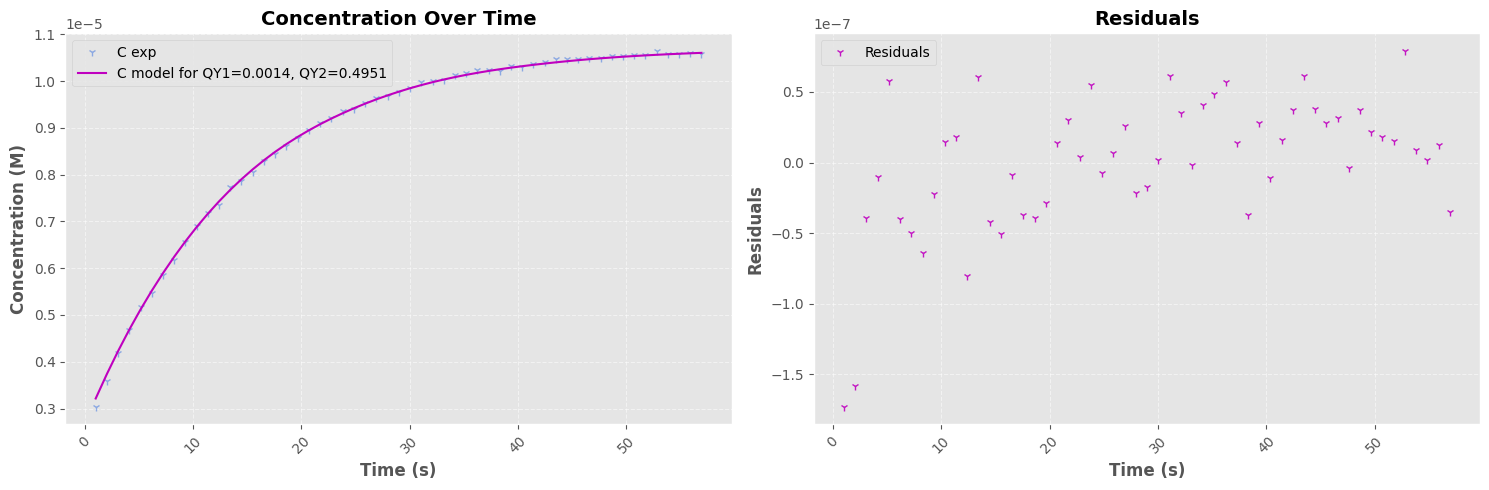

In [10]:
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# === Physics constants ===
h = 6.62607004 * 10 ** (-34)  # Planck's constant (J·s)
NA = 6.02214086 * 10 ** (23)  # Avogadro's number (mol^-1)
c_vaccum = 299792458  # Speed of light in vacuum (m/s)
wl = 405  # Wavelength (nm)
v = c_vaccum / (wl * 1e-9)  # Frequency (Hz)
volume = 23e-4  # Volume (L)
l = 1  # Path length (cm)

eps_on_482 = 65474
eps_off_482 = 65
eps_on_405 = 0.1847826087*eps_on_482
eps_off_405 = 25343

I_w_list = [ 3.8e-3 ] # No actinometry for 405nm LED

# === Experimental data ===
# Assuming 'timestamps_filtered' and 'C_exp' are already defined

# === Initialize parameters ===
lpopt = []
for I_w in I_w_list:
    # Compute initial concentration based on experimental data
    C_exp = mean_absorbance / (eps_on_482 * l)
    C0 = C_exp[-1]
    I_0 = I_w / (h * v * NA) / volume  # Photon irradiance (mol·L^-1·s^-1)

    # === ODE definition ===
    def dC_dt(t, C_ON, QY_ON2OFF, QY_OFF2ON):
        C_OFF = C0 - C_ON
        Iabs_ON = I_0 * (1 - np.exp(-eps_on_405 * C_ON * l * np.log(10)))
        Iabs_OFF = I_0 * (1 - np.exp(-eps_on_405 * C_OFF * l * np.log(10)))
        dCCF_deri = -QY_ON2OFF * Iabs_ON + QY_OFF2ON * Iabs_OFF
        return dCCF_deri

    # === Fitting function wrapper ===
    def model(t, QY_ON2OFF, QY_OFF2ON, offset):
        sol = solve_ivp(dC_dt, [t[0], t[-1]], [C_exp[0]], args=(QY_ON2OFF, QY_OFF2ON), t_eval=t)
        if not sol.success:
            print("⚠️ ODE solver failed:", sol.message)
            return np.full_like(t, np.nan)
        return sol.y[0]+ offset

    # === Fit the model to the experimental data ===
    initial_guess = (0.001, 0.2, 0) # QY_ON2OFF, QY_OFF2ON, offset
    bounds = ([1e-4, 1e-4,-1], [0.1, 1,1]) # ([min1, min2, ...], [max1, max2, ...])
    popt, pcov = curve_fit(model, timestamps_filtered, C_exp, p0=initial_guess, bounds=bounds)

    # Extract fitted parameters and compute uncertainties
    uncertainties = np.sqrt(np.diag(pcov))
    lpopt.append(popt)
    print(f"=== Fit Results I={I_w:0.3e} W ===")
    for i, (coef, incert) in enumerate(zip(popt, uncertainties), start=1):
        print(f"Parameter {i}: {coef:.4f} ± {incert:.4f}")

    # Compute fitted values
    fitted_values = model(timestamps_filtered, *popt)

    # === Plotting ===
    fig, a = plt.subplots(1, 2, figsize=(15, 5))
    pastel_colors = ["m", "#f9955e", "#5080e0"]  # Mauve, orange, sky blue

    # First Plot - Concentration Over Time
    a[0].plot(timestamps_filtered, C_exp, "1", color=pastel_colors[2], label="C exp", alpha=0.6)
    a[0].plot(timestamps_filtered, fitted_values, "-", color=pastel_colors[0], label=f"C model for QY1={popt[0]:0.4f}, QY2={popt[1]:0.4f}")
    a[0].set_xlabel("Time (s)", fontsize=12, fontweight="bold")
    a[0].set_ylabel("Concentration (M)", fontsize=12, fontweight="bold")
    a[0].set_title("Concentration Over Time", fontsize=14, fontweight="bold")
    a[0].tick_params(axis="x", rotation=45)
    a[0].grid(linestyle="--", alpha=0.5)
    a[0].legend()

    # Second Plot - Residuals Over Time
    residuals = C_exp - fitted_values
    a[1].plot(timestamps_filtered, residuals, "1", color=pastel_colors[0], label="Residuals", alpha=0.9)
    a[1].set_xlabel("Time (s)", fontsize=12, fontweight="bold")
    a[1].set_ylabel("Residuals", fontsize=12, fontweight="bold")
    a[1].set_title("Residuals", fontsize=14, fontweight="bold")
    a[1].tick_params(axis="x", rotation=45)
    a[1].grid(linestyle="--", alpha=0.5)
    a[1].legend()

    plt.tight_layout()
    plt.show()
